# Defining the Question


### a) Specifying the Question

> Implementing an optimum Naive Bayes (NB) classifier for purposes of email spam/ham classification.

### b) Defining the Metric for Success



> The metric of success is if we can build a NB classifier that can give a good overall accuracy and an especially high Precision in classifying non spam emails.

### c) Understanding the context

> Experimenting with the NB Classifier to build an optimum model that classifies count vectorized emails as ham/spam.

### d) Recording the Experimental Design


> The following design was used:


* Data importation
* Data Reading & Cleaning
* EDA
* Feature Selection & Engineering 
* Naive Bayes Classifier
* Optimization


### e) Data Relevance

> This was evaluated against the metric of success (after implementation of solution)

# Data Reading & Cleaning


## Importing the libraries

In [343]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, r2_score,classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold


## Importing the Dataset

In [344]:
#load dataset
spam = pd.read_csv('spambase.csv')

In [345]:
#check head
spam.head()


,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [346]:
#check tail
spam.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [355]:
#load column names
#load 
cols = pd.read_excel('cols.xlsx')

#reset col name which is a record
cols = pd.DataFrame(np.vstack([cols.columns, cols]))

#give column name
cols.columns = ['features']

#append target name
cols.loc[len(cols.index)] = ['spam']  

#shape of df
cols.shape


(58, 1)

In [357]:
#Editing the feature names
cols['name'] = cols['features'].str.split(':').str[0]

#drop old column
cols.drop('features', axis=1, inplace=True)
cols

,name
0,word_freq_make
1,word_freq_address
2,word_freq_all
3,word_freq_3d
4,word_freq_our
5,word_freq_over
6,word_freq_remove
7,word_freq_internet
8,word_freq_order
9,word_freq_mail


In [358]:
#make the names column heads so as to avoid multi-indexing
cols_1 = cols.transpose() 
cols_1.columns = cols_1.iloc[0]
cols_1.reset_index

<bound method DataFrame.reset_index of name  word_freq_make  word_freq_address  ...  capital_run_length_total  spam
name  word_freq_make  word_freq_address  ...  capital_run_length_total  spam

[1 rows x 58 columns]>

In [360]:
#viewing the transposed df
cols_1

name,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
name,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam


In [361]:
#replace column names of dataset with meaningful names
spam.columns = cols_1.columns

#dropping index name
spam = spam.rename_axis(None, axis = 1)
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [362]:
#check number of records
spam.shape

(4600, 58)

In [363]:
#checking column types
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

In [364]:
#checking summary stats
spam.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [365]:
#checking for nulls
spam.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

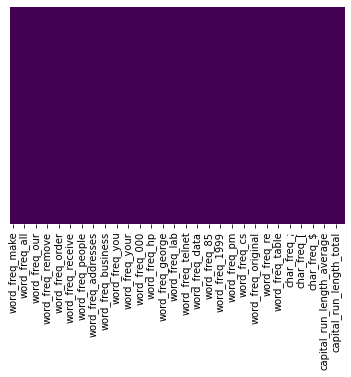

In [366]:
#visually looking at the nulls in the dataset
sns.heatmap(spam.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

> No nulls in the data. Data is clean.

# Exploratory Data Analysis

In [367]:
# Ploting the univariate summaries and recording our observations
def uni_stats(df):
  out_df = pd.DataFrame(columns=['Count', 'Nulls', 'Unique', 'Mode', 'Mean', 'Min','25%', 'Median', '75%', 'Max', 'Std_dev'])


  for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
      out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(), df[col].mode().values[0], df[col].mean(), df[col].min(), 
                         df[col].quantile(0.25), df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].std()]

    else:
     out_df.loc[col] = [df[col].count(), df[col].isnull().sum(), df[col].nunique(),df[col].mode().values[0],'-', '-', '-', '-', 
                        '-', '-', '-']

  return out_df

uni_stats(spam)

,Count,Nulls,Unique,Mode,Mean,Min,25%,Median,75%,Max,Std_dev
word_freq_make,4600.0,0.0,142.0,0.0,0.104576,0.0,0.000,0.0000,0.00000,4.540,0.305387
word_freq_address,4600.0,0.0,171.0,0.0,0.212922,0.0,0.000,0.0000,0.00000,14.280,1.290700
word_freq_all,4600.0,0.0,214.0,0.0,0.280578,0.0,0.000,0.0000,0.42000,5.100,0.504170
word_freq_3d,4600.0,0.0,43.0,0.0,0.065439,0.0,0.000,0.0000,0.00000,42.810,1.395303
word_freq_our,4600.0,0.0,255.0,0.0,0.312222,0.0,0.000,0.0000,0.38250,10.000,0.672586
word_freq_over,4600.0,0.0,141.0,0.0,0.095922,0.0,0.000,0.0000,0.00000,5.880,0.273850
word_freq_remove,4600.0,0.0,173.0,0.0,0.114233,0.0,0.000,0.0000,0.00000,7.270,0.391480
word_freq_internet,4600.0,0.0,170.0,0.0,0.105317,0.0,0.000,0.0000,0.00000,11.110,0.401112
word_freq_order,4600.0,0.0,144.0,0.0,0.090087,0.0,0.000,0.0000,0.00000,5.260,0.278643
word_freq_mail,4600.0,0.0,245.0,0.0,0.239465,0.0,0.000,0.0000,0.16000,18.180,0.644816


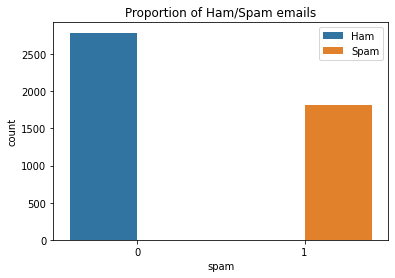

In [368]:
#count plot: Spam
sns.countplot(x='spam',data=spam, hue='spam')
plt.title('Proportion of Ham/Spam emails')
plt.legend(['Ham', 'Spam'])
plt.show()

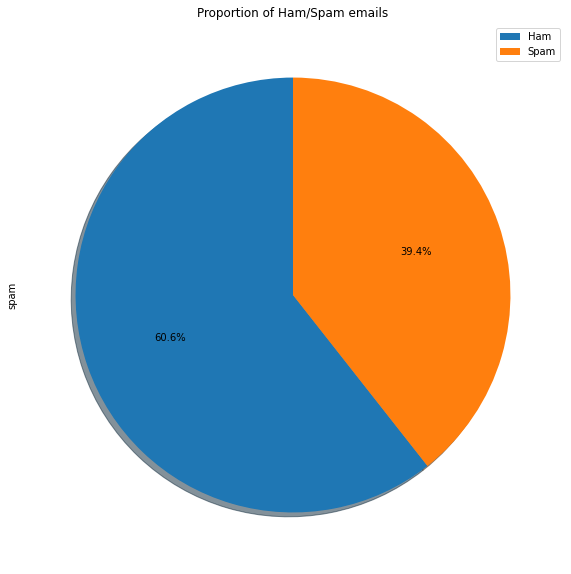

In [369]:
#Pie chart of the above just for a quick proportion view

spam.groupby(['spam'])['spam'].count().plot(kind='pie',labels=None, shadow = True,startangle=90,
                                                                      figsize=(15,10), autopct='%1.1f%%')
plt.legend(labels=['Ham','Spam'])
plt.title('Proportion of Ham/Spam emails')
plt.show()



# Feature Engineering & Selection

### Checking multicollinearity

In [375]:
#multicollinearity test
# Let's display the correlations between the variables
correlations = spam.corr()
    
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.137347,0.014587,-0.005899,-0.013656,0.010844,-0.015254,0.044967,0.061744,-0.052704,0.009614,-0.149014,-0.077065,-0.020196,-0.004577,0.049411,-0.029304,-0.036233,-0.019346,-0.027820,0.034879,-0.122623,0.013968,-0.113801,-0.164999,0.021703,0.005330,0.030872,-0.001144,0.026677,0.017766,-0.000302,0.497042,0.019212,-0.583125,0.007114,0.022054,0.033004,0.001778,-0.015948,0.050623,-0.019403,0.000064,-0.011881,0.007091,0.014407,0.016202,0.002040,0.007241,0.011748,-0.009913,0.020662,-0.026059,-0.042798,0.002423,-0.036634,0.015776,-0.038945,0.070561
word_freq_address,0.014587,1.036592,0.032537,0.012370,0.019404,0.022848,-0.004766,0.018414,0.006437,-0.044917,-0.004118,0.044429,0.025482,0.005880,0.001429,0.009714,0.005739,-0.051994,0.087615,0.013055,0.010465,0.018770,0.008740,-0.016877,0.060442,0.029012,0.082240,0.012647,0.006940,0.022642,0.008033,-0.260524,0.039695,0.124797,0.016357,0.048848,0.020856,0.007203,0.007502,0.023016,0.009193,0.031271,-0.004098,0.034755,0.023285,0.045876,0.014466,0.024471,0.008989,0.088251,0.023418,0.005338,-0.010774,-0.007646,0.019665,-0.063937,0.035425,0.072383
word_freq_all,-0.005899,0.032537,1.114516,0.028667,-0.014408,-0.023003,0.033931,0.033904,-0.027219,0.021854,0.031459,-0.059651,-0.005771,0.009529,-0.065476,-0.021875,0.029085,-0.062494,-0.068331,0.005011,-0.081762,0.045884,-0.045862,0.025923,0.042555,-0.001835,0.068977,0.008413,0.051440,-0.061589,-0.033989,-0.095319,0.033306,0.124581,0.013885,-0.021730,0.020363,-0.035803,-0.016540,0.043612,-0.000276,-0.033945,0.010664,0.042383,0.035902,0.035280,-0.034362,0.013511,0.003778,-0.013314,0.013072,-0.061811,0.004669,0.009742,-0.087757,-0.010146,-0.003609,-0.091832
word_freq_3d,-0.013656,0.012370,0.028667,1.010338,0.008257,0.023189,-0.003797,-0.003327,0.016082,0.007104,0.024635,0.015765,0.022096,-0.009904,0.006285,0.010871,0.003940,-0.014991,0.027514,0.016462,0.004645,-0.021904,0.000482,-0.028048,0.005827,0.002943,0.012208,0.002754,-0.002756,-0.001917,0.001092,-0.032995,0.005588,0.016076,-0.002556,0.003162,-0.002041,-0.000101,-0.005678,0.010739,0.000960,0.002518,0.002448,0.003931,0.005334,0.004525,0.001325,-0.000617,0.008892,0.026348,0.005510,0.013877,0.004221,0.010311,0.014492,-0.036802,0.001322,-0.077394
word_freq_our,0.010844,0.019404,-0.014408,0.008257,1.150871,-0.002028,-0.059166,0.037269,0.047376,-0.003248,0.012362,-0.043446,-0.007215,0.000101,-0.029578,-0.018466,-0.100333,-0.011306,-0.032290,0.027666,-0.040097,0.042347,0.008793,0.063798,-0.003807,0.028742,0.047106,0.017516,-0.016868,0.002534,0.018564,-0.151256,0.003603,0.061824,0.007483,0.019546,0.012039,-0.136782,0.012448,0.033761,0.005136,-0.135394,0.010846,-0.041282,0.008294,0.041417,0.021382,0.014518,-0.008399,0.021530,0.002026,0.047400,0.037985,0.008957,-0.035619,-0.026941,0.054950,-0.263472
word_freq_over,-0.015254,0.022848,-0.023003,0.023189,-0.002028,1.109960,0.004876,-0.033098,-0.047776,0.048406,0.018680,0.003972,-0.031744,0.010873,-0.092345,0.039549,0.006966,-0.006106,-0.021675,-0.018963,-0.006386,0.008479,-0.127243,-0.004947,0.014621,0.029452,0.030111,0.021976,0.002379,-0.023736

In [377]:
#drop highly corelated columns
spam_1 = spam.drop('word_freq_857',axis=1)

In [378]:
#multicollinearity test
# Let's display the correlations between the variables
correlations = spam_1.corr()
    
#VIF test
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.135486,0.015562,-0.005543,-0.013532,0.011411,-0.014837,0.045509,0.061878,-0.051993,0.009400,-0.148885,-0.076975,-0.019701,-0.004325,0.048875,-0.029273,-0.036811,-0.019797,-0.027549,0.035449,-0.121700,0.014318,-0.112922,-0.164153,0.021998,0.005568,0.031672,-0.001088,0.028578,0.019643,0.002142,0.019452,-0.102553,0.007876,0.025100,0.031958,0.001881,-0.015715,0.059045,-0.019413,-0.000532,-0.011040,0.007168,0.015041,0.016717,0.002094,0.007461,0.012198,-0.008404,0.020625,-0.026994,-0.044514,0.002070,-0.040417,0.015888,-0.039439,0.070595
word_freq_address,0.015562,1.036081,0.032350,0.012306,0.019107,0.022630,-0.005050,0.018344,0.006064,-0.044805,-0.004185,0.044382,0.025222,0.005748,0.001710,0.009698,0.006042,-0.051757,0.087473,0.012756,0.009981,0.018587,0.008279,-0.017320,0.060287,0.028887,0.081821,0.012618,0.005944,0.021658,0.006752,0.039570,-0.127094,0.015958,0.047252,0.021404,0.007149,0.007380,0.018601,0.009198,0.031583,-0.004539,0.034715,0.022952,0.045606,0.014437,0.024356,0.008753,0.087460,0.023438,0.005828,-0.009875,-0.007461,0.021648,-0.063996,0.035684,0.072366
word_freq_all,-0.005543,0.032350,1.114447,0.028643,-0.014516,-0.023083,0.033827,0.033878,-0.027356,0.021895,0.031434,-0.059668,-0.005865,0.009481,-0.065373,-0.021881,0.029196,-0.062407,-0.068383,0.004901,-0.081939,0.045817,-0.046030,0.025761,0.042498,-0.001881,0.068823,0.008402,0.051076,-0.061949,-0.034458,0.033260,0.032421,0.013739,-0.022314,0.020563,-0.035822,-0.016584,0.041997,-0.000274,-0.033831,0.010503,0.042368,0.035781,0.035181,-0.034372,0.013469,0.003692,-0.013603,0.013080,-0.061631,0.004998,0.009810,-0.087031,-0.010168,-0.003514,-0.091838
word_freq_3d,-0.013532,0.012306,0.028643,1.010330,0.008219,0.023161,-0.003833,-0.003336,0.016035,0.007118,0.024626,0.015759,0.022063,-0.009921,0.006320,0.010869,0.003979,-0.014961,0.027496,0.016425,0.004583,-0.021927,0.000424,-0.028104,0.005807,0.002927,0.012155,0.002751,-0.002882,-0.002041,0.000929,0.005572,-0.015826,-0.002606,0.002960,-0.001972,-0.000108,-0.005694,0.010180,0.000960,0.002558,0.002392,0.003926,0.005292,0.004491,0.001322,-0.000632,0.008862,0.026248,0.005512,0.013939,0.004335,0.010334,0.014743,-0.036810,0.001355,-0.077396
word_freq_our,0.011411,0.019107,-0.014516,0.008219,1.150698,-0.002154,-0.059331,0.037228,0.047159,-0.003183,0.012322,-0.043473,-0.007365,0.000024,-0.029415,-0.018475,-0.100157,-0.011169,-0.032373,0.027493,-0.040378,0.042241,0.008525,0.063541,-0.003896,0.028669,0.046863,0.017499,-0.017446,0.001963,0.017820,0.003530,-0.084420,0.007251,0.018620,0.012357,-0.136814,0.012377,0.031198,0.005139,-0.135213,0.010590,-0.041306,0.008101,0.041260,0.021365,0.014452,-0.008536,0.021070,0.002037,0.047684,0.038507,0.009064,-0.034468,-0.026976,0.055100,-0.263483
word_freq_over,-0.014837,0.022630,-0.023083,0.023161,-0.002154,1.109867,0.004754,-0.033129,-0.047936,0.048454,0.018651,0.003952,-0.031855,0.010817,-0.092224,0.039542,0.007096,-0.006005,-0.021736,-0.019091,-0.006593,0.008401,-0.127440,-0.005137,0.014555,0.029398,0.029932,0.021964,0.001953,-0.024157,0.005621,0.006929,-0.061659,0.010890,0.006618,0.006904,0.00

> After dropping column 'word_freq_857:          continuous', the VIF scores all come to withtin acceptable range(1-5) as compared to it's score of 132.

# Implementing the Solution

## Naive Bayes Classification(Multinomial)

### Build model function

In [379]:
#Build model as function

def create_model(X,y, test_frac):

  #split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac, random_state = 0)

 
  #create and fit model
  model = MultinomialNB().fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  #evaluate model
  print('Training Accuracy:', accuracy_score(y_train, model.predict(X_train)))
  print('Test Accuracy:', accuracy_score(y_test,y_pred))
  print('\n')
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))


### Define Features and Target variable

In [380]:
#features and label
X = spam_1.iloc[:, :-1].values
y = spam_1.iloc[:, -1].values


### Run and Evaluate model

In [385]:
#Run default model with 80/20 split
create_model(X,y,0.2)

Training Accuracy: 0.789945652173913
Test Accuracy: 0.808695652173913


Confusion Matrix:
[[449  89]
 [ 87 295]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       538
           1       0.77      0.77      0.77       382

    accuracy                           0.81       920
   macro avg       0.80      0.80      0.80       920
weighted avg       0.81      0.81      0.81       920



> The above model has a good accuracy and is not overfitting as the training set accuracy and test set accuracy are almost equal. The precision could be better as ideally we would want 100% precision in classifying Non spam email(no false positives).

### 70:30 Train/Test split

In [382]:
#Changing the split to 70/30
create_model(X,y,0.3)

Training Accuracy: 0.787888198757764
Test Accuracy: 0.8050724637681159


Confusion Matrix:
[[684 138]
 [131 427]]


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       822
           1       0.76      0.77      0.76       558

    accuracy                           0.81      1380
   macro avg       0.80      0.80      0.80      1380
weighted avg       0.81      0.81      0.81      1380



> The accuracies observed are the same as the 80/20 split.

### 60:40 Train/Test split

In [384]:
#Changing the split to 60/40
create_model(X,y,0.4)

Training Accuracy: 0.7833333333333333
Test Accuracy: 0.7923913043478261


Confusion Matrix:
[[913 184]
 [198 545]]


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83      1097
           1       0.75      0.73      0.74       743

    accuracy                           0.79      1840
   macro avg       0.78      0.78      0.78      1840
weighted avg       0.79      0.79      0.79      1840



> The accuracies are similar to the other splits but of note is the precision degrades using this split for non spam email. It drops by 2% which in this case is not ideal. In our case the best performing split is 80/20 especially also taking the precision of classifying non spam email aside from the overall accuracy of the model.

## Naive Bayes Classification(Gaussian)

### Build model function

In [386]:
#Build model as function
from sklearn.naive_bayes import GaussianNB
def create_model(X,y, test_frac):

  #split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac, random_state = 0)

 
  #create and fit model
  clf = GaussianNB().fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  
  #evaluate model
  print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
  print('Test Accuracy:', accuracy_score(y_test,y_pred))
  print('\n')
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))


### Define Features and Target variable

In [387]:
#features and label
X = spam_1.iloc[:, :-1].values
y = spam_1.iloc[:, -1].values


### Run and Evaluate model

In [388]:
#Run default model with 80/20 split
create_model(X,y,0.2)

Training Accuracy: 0.8241847826086957
Test Accuracy: 0.8315217391304348


Confusion Matrix:
[[393 145]
 [ 10 372]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       538
           1       0.72      0.97      0.83       382

    accuracy                           0.83       920
   macro avg       0.85      0.85      0.83       920
weighted avg       0.87      0.83      0.83       920



>The above model has a good test accuracy(the best so far) and is not overfitting as the training set accuracy and test set accuracy are almost equal. The precision is the best too in terms of classifying ham emails at 98% unlike classifying spam emails which is at 72%.

### 70:30 Train/Test split

In [389]:
#Changing the split to 70/30
create_model(X,y,0.3)

Training Accuracy: 0.824223602484472
Test Accuracy: 0.8318840579710145


Confusion Matrix:
[[605 217]
 [ 15 543]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       822
           1       0.71      0.97      0.82       558

    accuracy                           0.83      1380
   macro avg       0.85      0.85      0.83      1380
weighted avg       0.87      0.83      0.83      1380



>The accuracies observed are the same as the 80/20 split. Of note is the marginal drop in precision of classifying spam as spam by 1% so the 80/20 is considered better here.

### 60:40 Train/Test split

In [390]:
#Changing the split to 60/40
create_model(X,y,0.4)

Training Accuracy: 0.8159420289855073
Test Accuracy: 0.8206521739130435


Confusion Matrix:
[[795 302]
 [ 28 715]]


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.72      0.83      1097
           1       0.70      0.96      0.81       743

    accuracy                           0.82      1840
   macro avg       0.83      0.84      0.82      1840
weighted avg       0.86      0.82      0.82      1840



>The accuracies are similar to the other splits but of note is the precision degrades using this split for non spam email. It drops by 1% which in this case is not ideal. In our case the best performing split is 80/20 especially also taking the precision of classifying non spam email aside from the overall accuracy of the model.

## Optimization

Since the best classifier model so far is the Gaussian Model with a 80/20 split. It will be optimized to try and achieve a better performance.

In [391]:
# define model for tuning
#features and label
X = spam_1.iloc[:, :-1].values
y = spam_1.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

 
#create
clf = GaussianNB()

In [392]:
#define a search space to optimize
from sklearn.model_selection import GridSearchCV


params = {'var_smoothing':[1e-15, 1e-5] }

nb_opt = GridSearchCV(clf, params, n_jobs=-1)
nb_opt = nb_opt.fit(X_train, y_train)

nb_opt.best_params_

{'var_smoothing': 1e-15}

In [394]:
#Using the optimized parameters to classify

#features and label
X = spam_1.iloc[:, :-1].values
y = spam_1.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
 
#create and fit model
clf = GaussianNB(var_smoothing=1e-15).fit(X_train, y_train)
y_pred = clf.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))
  

Training Accuracy: 0.8201086956521739
Test Accuracy: 0.8315217391304348


Confusion Matrix:
[[393 145]
 [ 10 372]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       538
           1       0.72      0.97      0.83       382

    accuracy                           0.83       920
   macro avg       0.85      0.85      0.83       920
weighted avg       0.87      0.83      0.83       920



> No observable difference in performance with the default version.

##Data Reduction

It is possible that using only a subset of the features may achieve the same performance instead of using all features.

In [395]:
#Data Reduction
#features and label
X = spam_1.iloc[:, :-1].values
y = spam_1.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


#create and fit model
clf = GaussianNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)

#evaluate model
print('Training Accuracy:', accuracy_score(y_train, clf.predict(X_train)))
print('Test Accuracy:', accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Training Accuracy: 0.8956521739130435
Test Accuracy: 0.9032608695652173


Confusion Matrix:
[[513  25]
 [ 64 318]]


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       538
           1       0.93      0.83      0.88       382

    accuracy                           0.90       920
   macro avg       0.91      0.89      0.90       920
weighted avg       0.90      0.90      0.90       920



In [396]:
#show eigen values for the columns
lda.coef_

array([[-0.17696998, -0.14442103,  0.20304658,  0.17321368,  0.55503088,
         0.29383707,  0.77966995,  0.35789208,  0.19610609,  0.1004116 ,
         0.07792624, -0.23127566,  0.07675668, -0.04994517,  0.00145125,
         0.59019937,  0.24232675,  0.28854881,  0.25288949,  0.28223913,
         0.59597526,  0.42179052,  0.569612  ,  0.37848114, -0.35160749,
        -0.15627507, -0.34499848,  0.03337245, -0.04293765, -0.18267335,
        -0.09083776, -0.22393444,  0.09984542, -0.23758693,  0.14612869,
        -0.12818312, -0.14042841, -0.09727471,  0.1454797 , -0.02093492,
        -0.21619648, -0.12664209, -0.19050955, -0.3293601 , -0.33200876,
        -0.10989733, -0.16428707, -0.29332363, -0.0470665 , -0.04937633,
         0.48353099,  0.55983657,  0.11259378, -0.02347353,  0.25996544,
         0.3956529 ]])

In [397]:
#creating a df to store the features that have highest co-efficients
cols = spam_1.drop('spam', axis=1)
feat_matters = pd.DataFrame(index=cols.columns.values, data = lda.coef_[0].T)
feat_matters.sort_values(0, ascending =False)

,0
word_freq_remove,0.779670
word_freq_your,0.595975
word_freq_free,0.590199
word_freq_000,0.569612
char_freq_$,0.559837
word_freq_our,0.555031
char_freq_!,0.483531
word_freq_font,0.421791
capital_run_length_total,0.395653
word_freq_money,0.378481


> As per the above, it can be seen that the feature: 'word_freq_remove' carres the most information about the distribution of the data. This means it can be considered the most important.

> Since precision of non-spam emails is the most important aspect (metric) of our classification then the Gaussian Naive Bayes Classifier with a 80/20 split is taken to be the best performing model in this case.

##Cross Validation

Checking that the performance of Gaussian Naive Bayes was not due to the random chance it picked a sample that favoured it.

>The optimization didn't improve the classification accuracy of the Gaussian 80/20 split model. We can use the default version in this case.

In [401]:
# confirming the Accuracy through cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from statistics import mean, stdev
#features and label
X = spam_1.iloc[:, :-1].values
y = spam_1.iloc[:, -1].values

#split data with 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#create model
clf = GaussianNB()

#cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
n_scores = cross_val_score(clf, X_test, y_test, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), stdev(n_scores)))

Accuracy: 0.841 (0.034)


> We can observe that using an 80/20 split on the Gaussian Naive Bayes Classifier we achieve a test accuracy that is 83%. The precision of class 0 (Ham email) at 98% is the best amongst all models and which is very good but ideally we would like one that is at 100%. Cross validation of the test set accuracy showed the accuracy was 84% on average with a Standard Deviation of 3%. Although the LDA version of the model outperformed all models with an accuracy of 90% whereas Multinomial had 80%, our target for this experiment was to achiene the highest possible precision of class 0(Non-Spam emails) which was given by the Gaussian Naive Bayes model without LDA done and using a 80/20 data split achieving an overall test accuracy of 84% with a standard deviation of 3% and Precision of 98% in classifying non-spam emails.

# Challenging the Solution


> Using/ testing other models would be good so as to determine which is the best for this dataset.

# Follow up questions

## a) Did we have the right data?


> Yes because the data provided allowed for a model that was fairly accurate and had a high precision in classifying non spam emails, which was the metric of success we had beforehand.

## b) Do we need other data to answer our question?

> Firstly, it is recommended that other algorithms be tested before deciding whether additional data is required.



## c) Did we have the right question?

> Given the dataset and the business objective, the right question was asked and explored.